Regular CNN

Found 1618 images belonging to 24 classes.
Found 680 images belonging to 24 classes.
Epoch 1/100
50/50 [==============================] - 31s 566ms/step - loss: 3.1637 - accuracy: 0.0977 - val_loss: 3.0434 - val_accuracy: 0.1027
Epoch 2/100
50/50 [==============================] - 25s 511ms/step - loss: 2.3179 - accuracy: 0.3405 - val_loss: 2.1059 - val_accuracy: 0.4077
Epoch 3/100
50/50 [==============================] - 27s 545ms/step - loss: 1.5254 - accuracy: 0.5593 - val_loss: 1.6380 - val_accuracy: 0.5446
Epoch 4/100
50/50 [==============================] - 27s 537ms/step - loss: 0.9401 - accuracy: 0.7137 - val_loss: 1.4255 - val_accuracy: 0.6116
Epoch 5/100
50/50 [==============================] - 25s 502ms/step - loss: 0.5170 - accuracy: 0.8569 - val_loss: 1.6546 - val_accuracy: 0.6399
Epoch 6/100
50/50 [==============================] - 27s 534ms/step - loss: 0.1830 - accuracy: 0.9559 - val_loss: 1.5394 - val_accuracy: 0.6875
Epoch 7/100
50/50 [==============================] 

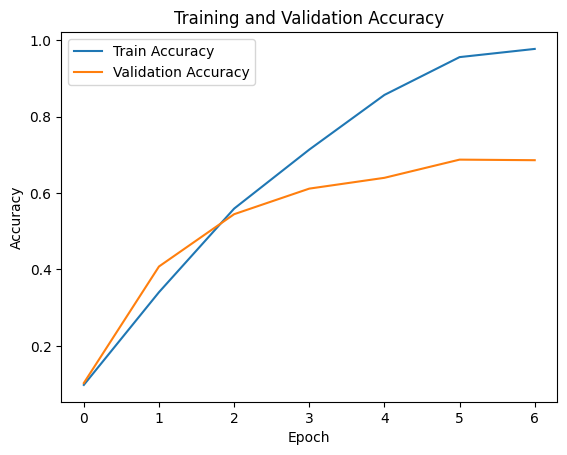

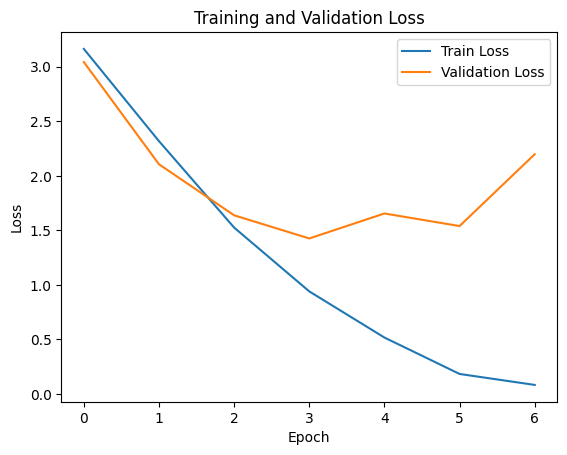


Train Accuracy: 0.8281829357147217
Test Accuracy: 0.6058823466300964
22/22 [==============================] - 8s 368ms/step

Performance Metrics:
                         precision    recall  f1-score   support

    10_Gateway_of_India       0.04      0.03      0.04        30
       11_Golden_Temple       0.03      0.03      0.03        30
          12_Hava_Mahal       0.00      0.00      0.00        30
        13_Humayun_Tomb       0.00      0.00      0.00        30
          14_India_Gate       0.04      0.07      0.05        30
         15_Iron_Pillar       0.00      0.00      0.00        29
  16_Jamali_Kamali_Tomb       0.05      0.03      0.04        29
           17_Khajuraho       0.00      0.00      0.00        30
        18_Lotus_Temple       0.00      0.00      0.00         0
       19_Mysore_Palace       0.05      0.03      0.04        30
         1_Ajanta_Caves       0.00      0.00      0.00        30
         20_Qutub_Minar       0.07      0.06      0.07        47
   21_S

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.callbacks import EarlyStopping

# Set the directory path for your dataset
train_dir = 'images/train'
test_dir = 'images/test'

# Define parameters
batch_size = 32
img_height = 150
img_width = 150
num_classes = 24

# Create ImageDataGenerator instances
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Load and preprocess the training data
train_data_gen = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

# Load and preprocess the test data
test_data_gen = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Implement Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model
history = model.fit(
    train_data_gen,
    steps_per_epoch=train_data_gen.samples // batch_size,
    epochs=100,
    validation_data=test_data_gen,
    validation_steps=test_data_gen.samples // batch_size,
    callbacks=[early_stopping]
)

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

# Evaluate the model on training data
train_loss, train_accuracy = model.evaluate(train_data_gen, verbose=0)
print("\nTrain Accuracy:", train_accuracy)

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(test_data_gen, verbose=0)
print("Test Accuracy:", test_accuracy)

# Make predictions on test data
Y_pred = model.predict(test_data_gen)
y_pred = np.argmax(Y_pred, axis=1)
y_true = test_data_gen.classes

# Get class names from the data generator
class_names = list(train_data_gen.class_indices.keys())

# Compute performance metrics
print("\nPerformance Metrics:")
print(classification_report(y_true, y_pred, target_names=class_names))


ResNet50

Found 1618 images belonging to 24 classes.
Found 680 images belonging to 24 classes.
Epoch 1/100


c:\Users\Angelina George\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


50/50 ━━━━━━━━━━━━━━━━━━━━ 21s 357ms/step - accuracy: 0.0426 - loss: 3.2662 - val_accuracy: 0.0491 - val_loss: 3.1129
Epoch 2/100
 1/50 ━━━━━━━━━━━━━━━━━━━━ 10s 211ms/step - accuracy: 0.0000e+00 - loss: 3.1951

c:\Users\Angelina George\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0000e+00 - loss: 3.1951 - val_accuracy: 0.1250 - val_loss: 3.0733
Epoch 3/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 21s 402ms/step - accuracy: 0.0641 - loss: 3.1186 - val_accuracy: 0.1205 - val_loss: 3.0584
Epoch 4/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0938 - loss: 2.9833 - val_accuracy: 0.1250 - val_loss: 2.9566
Epoch 5/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 21s 413ms/step - accuracy: 0.0945 - loss: 3.0810 - val_accuracy: 0.0863 - val_loss: 3.0500
Epoch 6/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0625 - loss: 3.0537 - val_accuracy: 0.1250 - val_loss: 2.9984
Epoch 7/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 21s 406ms/step - accuracy: 0.1139 - loss: 3.0276 - val_accuracy: 0.1429 - val_loss: 2.9545
Epoch 8/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2188 - loss: 2.8905 - val_accuracy: 0.1250 - val_loss: 3.0903
Epoch 9/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 23s 448ms/step - accuracy: 0.1108 - loss: 2.9748 - val_accuracy: 0.1503

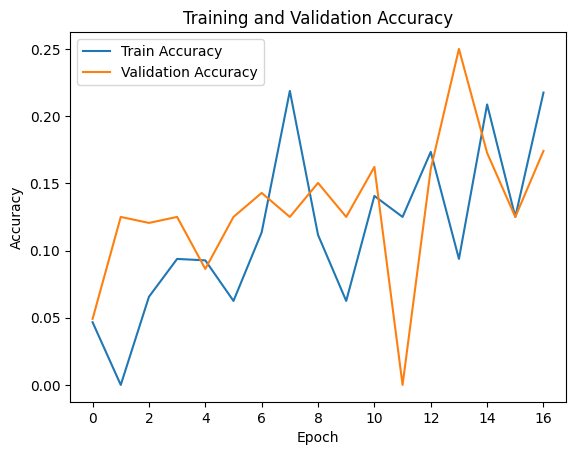

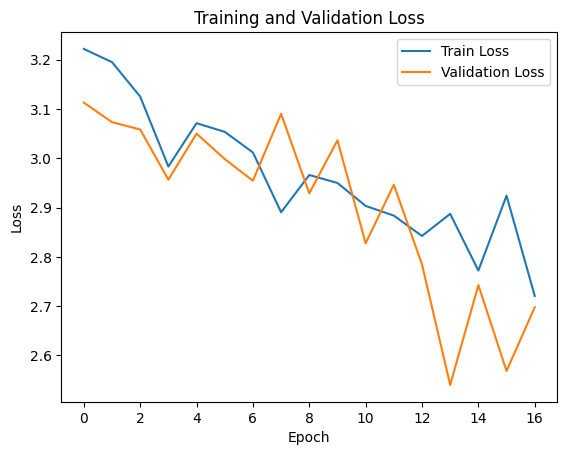


Train Accuracy: 0.1959208846092224
Test Accuracy: 0.1823529452085495
22/22 ━━━━━━━━━━━━━━━━━━━━ 8s 326ms/step


In [2]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

# Set the directory path for your dataset
train_dir = 'images/train'
test_dir = 'images/test'

# Define parameters
batch_size = 32
img_height = 150
img_width = 150
num_classes = 24

# Create ImageDataGenerator instances
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Load and preprocess the training data
train_data_gen = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

# Load and preprocess the test data
test_data_gen = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

# Load the ResNet50 model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

# Freeze the pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers on top of ResNet50
model = tf.keras.Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(512, activation='relu'),
    Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Implement Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model
history = model.fit(
    train_data_gen,
    steps_per_epoch=train_data_gen.samples // batch_size,
    epochs=100,
    validation_data=test_data_gen,
    validation_steps=test_data_gen.samples // batch_size,
    callbacks=[early_stopping]
)

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

# Evaluate the model on training data
train_loss, train_accuracy = model.evaluate(train_data_gen, verbose=0)
print("\nTrain Accuracy:", train_accuracy)

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(test_data_gen, verbose=0)
print("Test Accuracy:", test_accuracy)

# Make predictions on test data
Y_pred = model.predict(test_data_gen)
y_pred = np.argmax(Y_pred, axis=1)
y_true = test_data_gen.classes

# Get class names from the data generator
class_names = list(train_data_gen.class_indices.keys())


ResNet101

Found 1618 images belonging to 24 classes.
Found 680 images belonging to 24 classes.
171446536/171446536 ━━━━━━━━━━━━━━━━━━━━ 40s 0us/step
Epoch 1/100


c:\Users\Angelina George\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


50/50 ━━━━━━━━━━━━━━━━━━━━ 43s 748ms/step - accuracy: 0.0624 - loss: 4.4902 - val_accuracy: 0.0729 - val_loss: 3.0355
Epoch 2/100
 1/50 ━━━━━━━━━━━━━━━━━━━━ 26s 541ms/step - accuracy: 0.0000e+00 - loss: 3.1105

c:\Users\Angelina George\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.0000e+00 - loss: 3.1105 - val_accuracy: 0.0000e+00 - val_loss: 3.1760
Epoch 3/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 40s 768ms/step - accuracy: 0.1266 - loss: 2.9884 - val_accuracy: 0.1667 - val_loss: 2.8303
Epoch 4/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.0625 - loss: 2.9579 - val_accuracy: 0.2500 - val_loss: 2.9876
Epoch 5/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 39s 753ms/step - accuracy: 0.1687 - loss: 2.8054 - val_accuracy: 0.1622 - val_loss: 2.7219
Epoch 6/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.1250 - loss: 2.7480 - val_accuracy: 0.2500 - val_loss: 2.6115
Epoch 7/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 40s 782ms/step - accuracy: 0.2260 - loss: 2.6466 - val_accuracy: 0.2083 - val_loss: 2.5918
Epoch 8/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3750 - loss: 2.3726 - val_accuracy: 0.1250 - val_loss: 2.7404
Epoch 9/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 40s 783ms/step - accuracy: 0.2551 - loss: 2.4734 - val_accuracy: 0

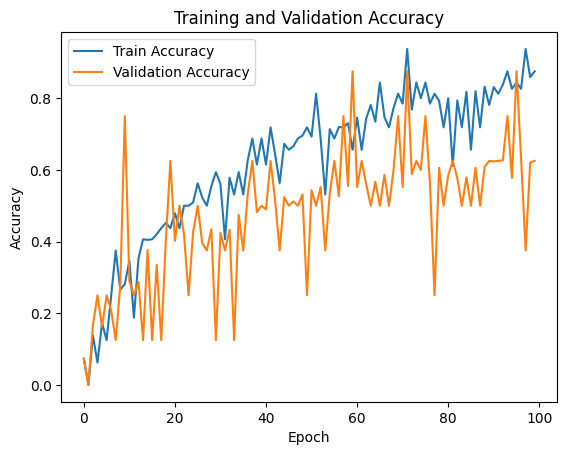

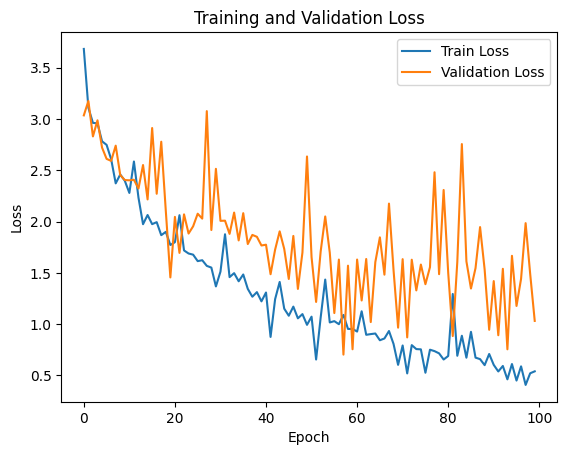


Train Accuracy: 0.8924598097801208
Test Accuracy: 0.6323529481887817
22/22 ━━━━━━━━━━━━━━━━━━━━ 14s 542ms/step


In [3]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.applications import ResNet101
from sklearn.metrics import classification_report

# Set the directory path for your dataset
train_dir = 'images/train'
test_dir = 'images/test'

# Define parameters
batch_size = 32
img_height = 150
img_width = 150
num_classes = 24

# Create ImageDataGenerator instances
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Load and preprocess the training data
train_data_gen = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

# Load and preprocess the test data
test_data_gen = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

# Define the ResNet101 model
base_model = ResNet101(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

# Freeze the base model
base_model.trainable = False

# Create new model on top
model = Sequential([
    base_model,
    Flatten(),
    Dense(512, activation='relu'),
    Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train_data_gen,
    steps_per_epoch=train_data_gen.samples // batch_size,
    epochs=100,
    validation_data=test_data_gen,
    validation_steps=test_data_gen.samples // batch_size
)

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

# Evaluate the model on training data
train_loss, train_accuracy = model.evaluate(train_data_gen, verbose=0)
print("\nTrain Accuracy:", train_accuracy)

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(test_data_gen, verbose=0)
print("Test Accuracy:", test_accuracy)

# Make predictions on test data
Y_pred = model.predict(test_data_gen)
y_pred = np.argmax(Y_pred, axis=1)
y_true = test_data_gen.classes

# Get class names from the data generator
class_names = list(train_data_gen.class_indices.keys())

ResNet152

Found 1618 images belonging to 24 classes.
Found 680 images belonging to 24 classes.
234698864/234698864 ━━━━━━━━━━━━━━━━━━━━ 56s 0us/step
Epoch 1/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 495s 9s/step - accuracy: 0.3076 - loss: 2.7599 - val_accuracy: 0.0432 - val_loss: 193558.9375
Epoch 2/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.6250 - loss: 1.4252 - val_accuracy: 0.0000e+00 - val_loss: 193001.2969
Epoch 3/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 403s 8s/step - accuracy: 0.6519 - loss: 1.1168 - val_accuracy: 0.0432 - val_loss: 76.1457
Epoch 4/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 0.7500 - loss: 0.7658 - val_accuracy: 0.1250 - val_loss: 64.2552
Epoch 5/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 446s 9s/step - accuracy: 0.7783 - loss: 0.7018 - val_accuracy: 0.0446 - val_loss: 8.0307
Epoch 6/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 12s 50ms/step - accuracy: 0.7812 - loss: 0.6721 - val_accuracy: 0.0000e+00 - val_loss: 7.5057
Epoch 7/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 462s 9s/step - accuracy: 0.8839 -

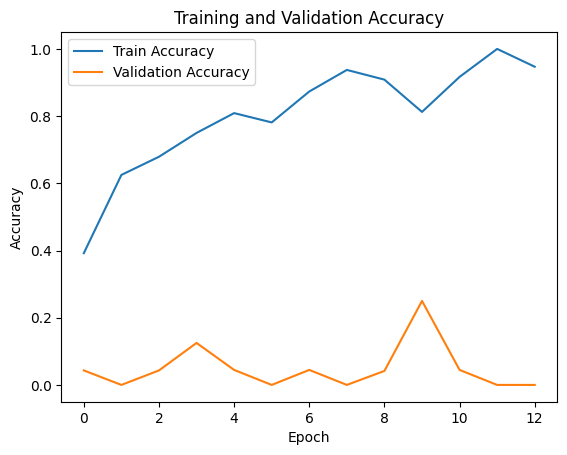

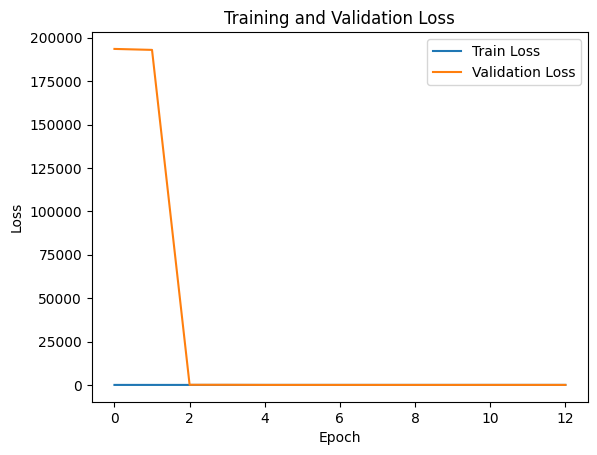


Train Accuracy: 0.04326328635215759
Test Accuracy: 0.04411764815449715
22/22 ━━━━━━━━━━━━━━━━━━━━ 72s 3s/step


In [4]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.applications import ResNet152
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.callbacks import EarlyStopping

# Set the directory path for your dataset
train_dir = 'images/train'
test_dir = 'images/test'

# Define parameters
batch_size = 32
img_height = 224  # ResNet152 input shape
img_width = 224   # ResNet152 input shape
num_classes = 24

# Create ImageDataGenerator instances
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Load and preprocess the training data
train_data_gen = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

# Load and preprocess the test data
test_data_gen = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

# Load the ResNet152 model
base_model = ResNet152(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

# Add custom classification head
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(512, activation='relu'),
    Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Implement Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model
history = model.fit(
    train_data_gen,
    steps_per_epoch=train_data_gen.samples // batch_size,
    epochs=100,
    validation_data=test_data_gen,
    validation_steps=test_data_gen.samples // batch_size,
    callbacks=[early_stopping]
)

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

# Evaluate the model on training data
train_loss, train_accuracy = model.evaluate(train_data_gen, verbose=0)
print("\nTrain Accuracy:", train_accuracy)

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(test_data_gen, verbose=0)
print("Test Accuracy:", test_accuracy)

# Make predictions on test data
Y_pred = model.predict(test_data_gen)
y_pred = np.argmax(Y_pred, axis=1)
y_true = test_data_gen.classes

# Get class names from the data generator
class_names = list(train_data_gen.class_indices.keys())


ResNet50V2

Found 1618 images belonging to 24 classes.
Found 680 images belonging to 24 classes.
94668760/94668760 ━━━━━━━━━━━━━━━━━━━━ 24s 0us/step
Epoch 1/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 48s 764ms/step - accuracy: 0.4432 - loss: 11.2707 - val_accuracy: 0.8229 - val_loss: 0.9191
Epoch 2/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7188 - loss: 0.9745 - val_accuracy: 0.6250 - val_loss: 2.8904
Epoch 3/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 30s 573ms/step - accuracy: 0.9470 - loss: 0.2103 - val_accuracy: 0.8616 - val_loss: 0.8762
Epoch 4/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 0.0028 - val_accuracy: 0.6250 - val_loss: 2.3005
Epoch 5/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 26s 500ms/step - accuracy: 0.9878 - loss: 0.0329 - val_accuracy: 0.8750 - val_loss: 0.8398
Epoch 6/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9688 - loss: 0.0422 - val_accuracy: 1.0000 - val_loss: 1.3912e-04
Epoch 7/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 27s 516ms/step - accuracy: 0.9958 - loss: 0.015

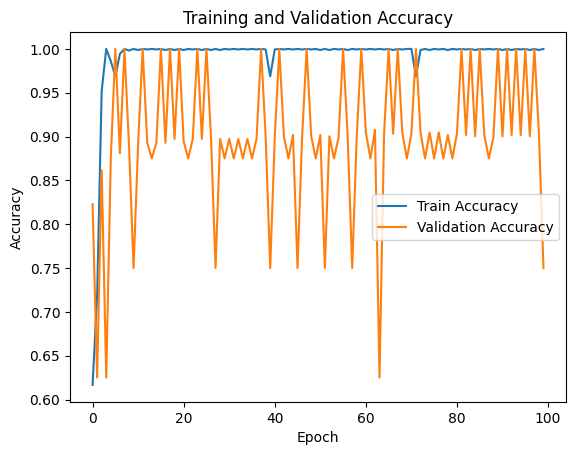

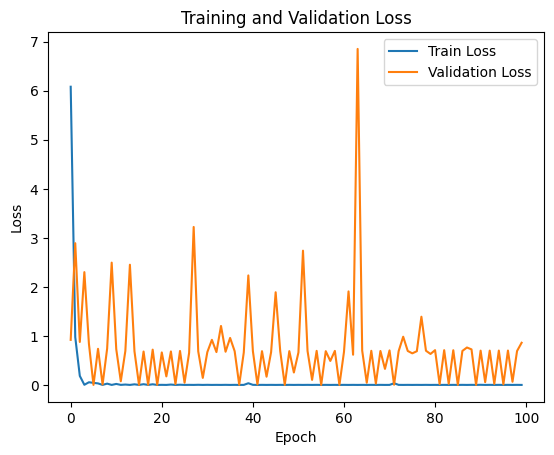


Train Accuracy: 0.999381959438324
Test Accuracy: 0.9014706015586853
22/22 ━━━━━━━━━━━━━━━━━━━━ 11s 428ms/step


In [5]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.applications import ResNet50V2
from sklearn.metrics import classification_report

# Set the directory path for your dataset
train_dir = 'images/train'
test_dir = 'images/test'

# Define parameters
batch_size = 32
img_height = 150
img_width = 150
num_classes = 24

# Create ImageDataGenerator instances
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Load and preprocess the training data
train_data_gen = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

# Load and preprocess the test data
test_data_gen = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

# Load pre-trained ResNet50V2 model without top (include_top=False)
base_model = ResNet50V2(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

# Freeze the convolutional base
base_model.trainable = False

# Create a new model on top
model = Sequential([
    base_model,
    Flatten(),
    Dense(512, activation='relu'),
    Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train_data_gen,
    steps_per_epoch=train_data_gen.samples // batch_size,
    epochs=100,
    validation_data=test_data_gen,
    validation_steps=test_data_gen.samples // batch_size
)

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

# Evaluate the model on training data
train_loss, train_accuracy = model.evaluate(train_data_gen, verbose=0)
print("\nTrain Accuracy:", train_accuracy)

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(test_data_gen, verbose=0)
print("Test Accuracy:", test_accuracy)

# Make predictions on test data
Y_pred = model.predict(test_data_gen)
y_pred = np.argmax(Y_pred, axis=1)
y_true = test_data_gen.classes

# Get class names from the data generator
class_names = list(train_data_gen.class_indices.keys())


6. InceptionV3

Found 1618 images belonging to 24 classes.
Found 680 images belonging to 24 classes.
87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 52s 1us/step
Epoch 1/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 46s 764ms/step - accuracy: 0.3724 - loss: 3.1734 - val_accuracy: 0.6964 - val_loss: 1.1065
Epoch 2/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8125 - loss: 1.0616 - val_accuracy: 0.6250 - val_loss: 1.5301
Epoch 3/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 36s 678ms/step - accuracy: 0.8366 - loss: 0.5439 - val_accuracy: 0.8244 - val_loss: 0.6626
Epoch 4/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8438 - loss: 0.7054 - val_accuracy: 0.7500 - val_loss: 0.8178
Epoch 5/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 36s 696ms/step - accuracy: 0.9124 - loss: 0.2911 - val_accuracy: 0.8199 - val_loss: 0.5770
Epoch 6/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 1.0000 - loss: 0.0670 - val_accuracy: 0.6250 - val_loss: 1.6110
Epoch 7/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 36s 696ms/step - accuracy: 0.9485 - loss: 0.1738 - v

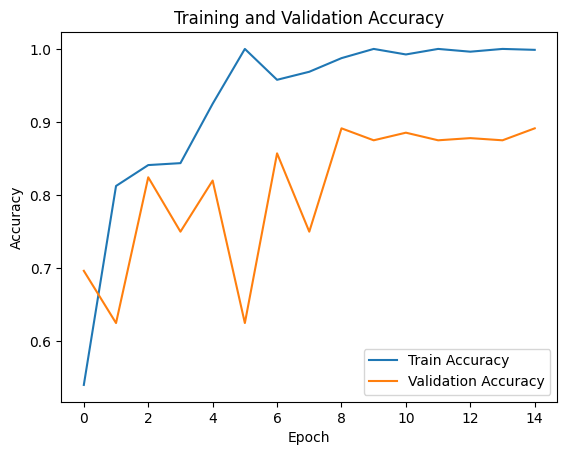

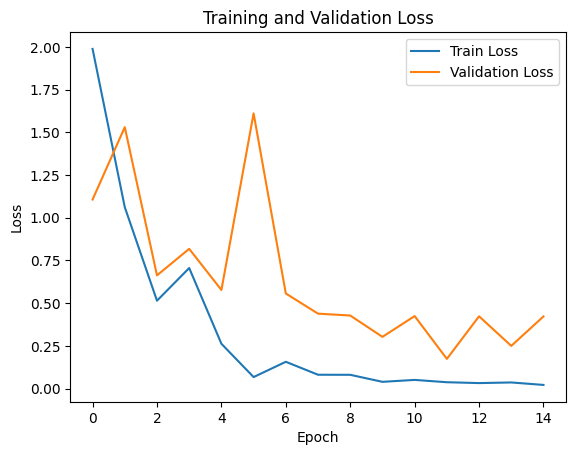


Train Accuracy: 0.9981458783149719
Test Accuracy: 0.8926470875740051
22/22 ━━━━━━━━━━━━━━━━━━━━ 15s 555ms/step


In [6]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.applications import InceptionV3
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.callbacks import EarlyStopping

# Set the directory path for your dataset
train_dir = 'images/train'
test_dir = 'images/test'

# Define parameters
batch_size = 32
img_height = 150
img_width = 150
num_classes = 24

# Create ImageDataGenerator instances
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Load and preprocess the training data
train_data_gen = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

# Load and preprocess the test data
test_data_gen = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

# Load InceptionV3 model without including top layer
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

# Freeze the layers in the base InceptionV3 model
for layer in base_model.layers:
    layer.trainable = False

# Add custom classification layers
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(512, activation='relu'),
    Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Implement Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model
history = model.fit(
    train_data_gen,
    steps_per_epoch=train_data_gen.samples // batch_size,
    epochs=100,
    validation_data=test_data_gen,
    validation_steps=test_data_gen.samples // batch_size,
    callbacks=[early_stopping]
)

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

# Evaluate the model on training data
train_loss, train_accuracy = model.evaluate(train_data_gen, verbose=0)
print("\nTrain Accuracy:", train_accuracy)

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(test_data_gen, verbose=0)
print("Test Accuracy:", test_accuracy)

# Make predictions on test data
Y_pred = model.predict(test_data_gen)
y_pred = np.argmax(Y_pred, axis=1)
y_true = test_data_gen.classes

# Get class names from the data generator
class_names = list(train_data_gen.class_indices.keys())


7. InceptionResNetV2

Found 1618 images belonging to 24 classes.
Found 680 images belonging to 24 classes.

219055592/219055592 ━━━━━━━━━━━━━━━━━━━━ 139s 1us/step
Epoch 1/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 85s 1s/step - accuracy: 0.3748 - loss: 2.8348 - val_accuracy: 0.6637 - val_loss: 1.1516
Epoch 2/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.6562 - loss: 0.9087 - val_accuracy: 0.5000 - val_loss: 1.3346
Epoch 3/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 64s 1s/step - accuracy: 0.7600 - loss: 0.8370 - val_accuracy: 0.7619 - val_loss: 0.7784
Epoch 4/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8125 - loss: 0.5630 - val_accuracy: 0.6250 - val_loss: 0.9410
Epoch 5/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 63s 1s/step - accuracy: 0.8281 - loss: 0.5333 - val_accuracy: 0.7961 - val_loss: 0.6413
Epoch 6/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8125 - loss: 0.8056 - val_accuracy: 0.6250 - val_loss: 0.7939
Epoch 7/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 63s 1s/step - accuracy: 0.8739 - loss: 0.4366 - val_accur

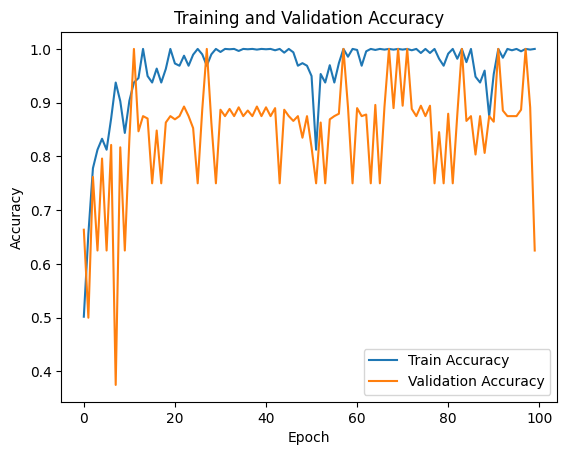

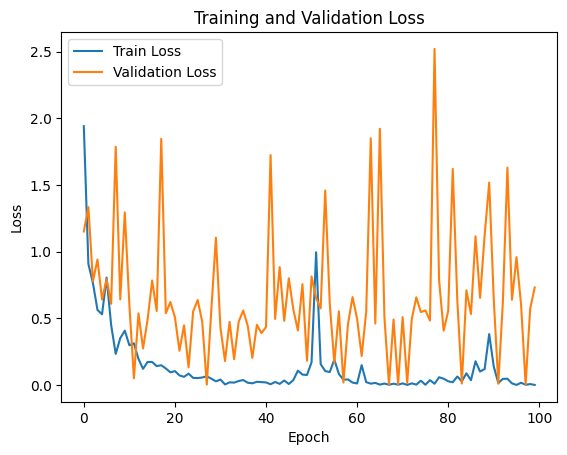


Train Accuracy: 0.999381959438324
Test Accuracy: 0.8867647051811218
22/22 ━━━━━━━━━━━━━━━━━━━━ 26s 841ms/step


In [7]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.applications import InceptionResNetV2
from sklearn.metrics import classification_report

# Set the directory path for your dataset
train_dir = 'images/train'
test_dir = 'images/test'

# Define parameters
batch_size = 32
img_height = 150
img_width = 150
num_classes = 24

# Create ImageDataGenerator instances
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Load and preprocess the training data
train_data_gen = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

# Load and preprocess the test data
test_data_gen = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

# Load InceptionResNetV2 pre-trained on ImageNet without the top classification layer
base_model = InceptionResNetV2(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

# Freeze the pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

# Add new classification layers on top
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(512, activation='relu'),
    Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train_data_gen,
    steps_per_epoch=train_data_gen.samples // batch_size,
    epochs=100,
    validation_data=test_data_gen,
    validation_steps=test_data_gen.samples // batch_size
)

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

# Evaluate the model on training data
train_loss, train_accuracy = model.evaluate(train_data_gen, verbose=0)
print("\nTrain Accuracy:", train_accuracy)

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(test_data_gen, verbose=0)
print("Test Accuracy:", test_accuracy)

# Make predictions on test data
Y_pred = model.predict(test_data_gen)
y_pred = np.argmax(Y_pred, axis=1)
y_true = test_data_gen.classes

# Get class names from the data generator
class_names = list(train_data_gen.class_indices.keys())


8. VGG16

Found 1618 images belonging to 24 classes.
Found 680 images belonging to 24 classes.
58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 49s 1us/step
Epoch 1/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 53s 996ms/step - accuracy: 0.4088 - loss: 2.3588 - val_accuracy: 0.8333 - val_loss: 0.6744
Epoch 2/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6667 - loss: 1.0854 - val_accuracy: 0.7500 - val_loss: 0.5735
Epoch 3/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 64s 1s/step - accuracy: 0.9002 - loss: 0.3312 - val_accuracy: 0.8705 - val_loss: 0.4910
Epoch 4/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9375 - loss: 0.2536 - val_accuracy: 0.7500 - val_loss: 0.5444
Epoch 5/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 64s 1s/step - accuracy: 0.9928 - loss: 0.0700 - val_accuracy: 0.8735 - val_loss: 0.4525
Epoch 6/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9688 - loss: 0.1216 - val_accuracy: 1.0000 - val_loss: 0.1957
Epoch 7/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 66s 1s/step - accuracy: 0.9974 - loss: 0.0420 - val_accurac

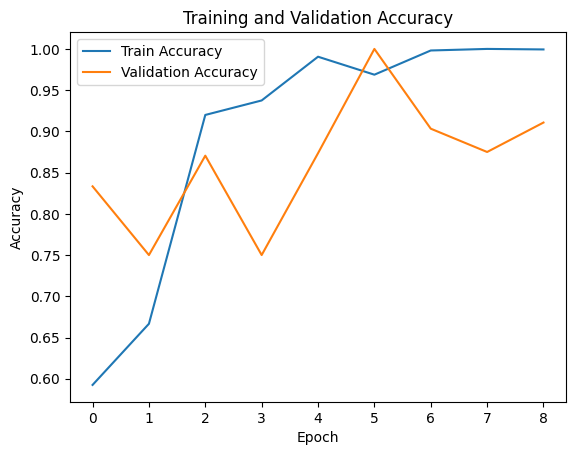

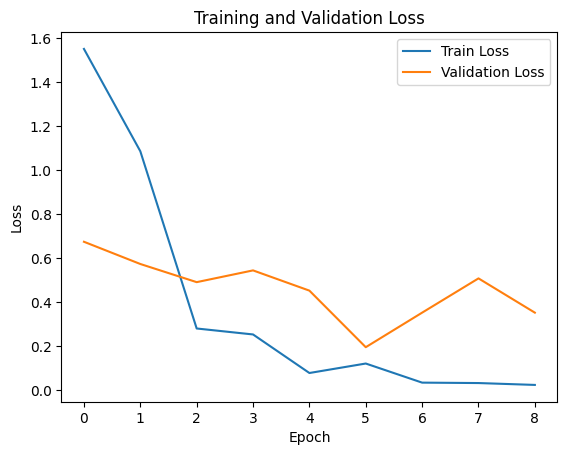


Train Accuracy: 0.990111231803894
Test Accuracy: 0.8897058963775635
22/22 ━━━━━━━━━━━━━━━━━━━━ 19s 832ms/step


In [8]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.applications import VGG16
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report

# Set the directory path for your dataset
train_dir = 'images/train'
test_dir = 'images/test'

# Define parameters
batch_size = 32
img_height = 150
img_width = 150
num_classes = 24

# Create ImageDataGenerator instances
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Load and preprocess the training data
train_data_gen = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

# Load and preprocess the test data
test_data_gen = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

# Load the VGG16 model without the top (fully connected) layers
vgg_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

# Freeze the pre-trained layers
for layer in vgg_model.layers:
    layer.trainable = False

# Create a new model on top
model = Sequential([
    vgg_model,
    Flatten(),
    Dense(512, activation='relu'),
    Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Implement Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model
history = model.fit(
    train_data_gen,
    steps_per_epoch=train_data_gen.samples // batch_size,
    epochs=100,
    validation_data=test_data_gen,
    validation_steps=test_data_gen.samples // batch_size,
    callbacks=[early_stopping]
)

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

# Evaluate the model on training data
train_loss, train_accuracy = model.evaluate(train_data_gen, verbose=0)
print("\nTrain Accuracy:", train_accuracy)

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(test_data_gen, verbose=0)
print("Test Accuracy:", test_accuracy)

# Make predictions on test data
Y_pred = model.predict(test_data_gen)
y_pred = np.argmax(Y_pred, axis=1)
y_true = test_data_gen.classes

# Get class names from the data generator
class_names = list(train_data_gen.class_indices.keys())


9. EfficientNetB0

Found 1618 images belonging to 24 classes.
Found 680 images belonging to 24 classes.
16804768/16804768 ━━━━━━━━━━━━━━━━━━━━ 13s 1us/step
Epoch 1/100


c:\Users\Angelina George\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


50/50 ━━━━━━━━━━━━━━━━━━━━ 120s 2s/step - accuracy: 0.5781 - loss: 1.6054 - val_accuracy: 0.6949 - val_loss: 1.2452
Epoch 2/100
 1/50 ━━━━━━━━━━━━━━━━━━━━ 57s 1s/step - accuracy: 0.9688 - loss: 0.2925

c:\Users\Angelina George\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.9688 - loss: 0.2925 - val_accuracy: 0.6250 - val_loss: 0.9356
Epoch 3/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 69s 1s/step - accuracy: 0.9554 - loss: 0.1592 - val_accuracy: 0.8497 - val_loss: 0.6701
Epoch 4/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9688 - loss: 0.1157 - val_accuracy: 0.7500 - val_loss: 0.4476
Epoch 5/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 68s 1s/step - accuracy: 0.9849 - loss: 0.0588 - val_accuracy: 0.8616 - val_loss: 0.7859
Epoch 6/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 1.0000 - loss: 0.0266 - val_accuracy: 1.0000 - val_loss: 0.1185
Epoch 7/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 66s 1s/step - accuracy: 0.9719 - loss: 0.1191 - val_accuracy: 0.8795 - val_loss: 0.6965
Epoch 8/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9375 - loss: 0.1419 - val_accuracy: 1.0000 - val_loss: 1.0277e-04
Epoch 9/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 67s 1s/step - accuracy: 0.9706 - loss: 0.1070 - val_accuracy: 0.8542 - val_loss

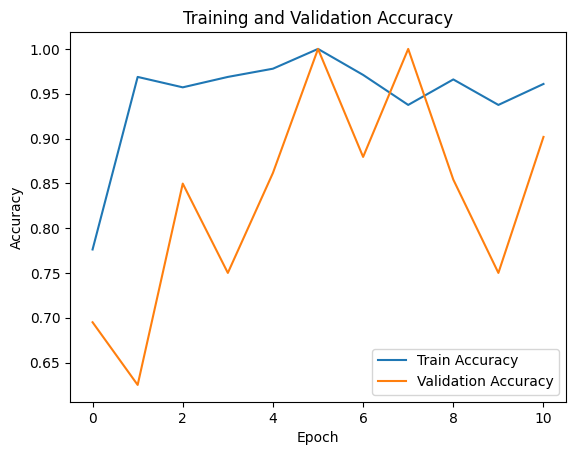

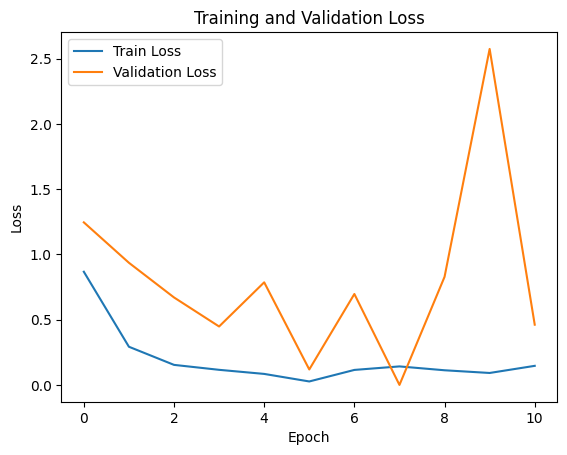


Train Accuracy: 0.9579728245735168
Test Accuracy: 0.8823529481887817
22/22 ━━━━━━━━━━━━━━━━━━━━ 13s 497ms/step


In [11]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.callbacks import EarlyStopping
from efficientnet.tfkeras import EfficientNetB0

# Set the directory path for your dataset
train_dir = 'images/train'
test_dir = 'images/test'

# Define parameters
batch_size = 32
img_height = 150
img_width = 150
num_classes = 24

# Create ImageDataGenerator instances
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Load and preprocess the training data
train_data_gen = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

# Load and preprocess the test data
test_data_gen = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

# Define the EfficientNetB0 model
model = Sequential([
    EfficientNetB0(input_shape=(img_height, img_width, 3), include_top=False, weights='imagenet'),
    tf.keras.layers.GlobalAveragePooling2D(),
    Dense(512, activation='relu'),
    Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Implement Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model
history = model.fit(
    train_data_gen,
    steps_per_epoch=train_data_gen.samples // batch_size,
    epochs=100,
    validation_data=test_data_gen,
    validation_steps=test_data_gen.samples // batch_size,
    callbacks=[early_stopping]
)

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

# Evaluate the model on training data
train_loss, train_accuracy = model.evaluate(train_data_gen, verbose=0)
print("\nTrain Accuracy:", train_accuracy)

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(test_data_gen, verbose=0)
print("Test Accuracy:", test_accuracy)

# Make predictions on test data
Y_pred = model.predict(test_data_gen)
y_pred = np.argmax(Y_pred, axis=1)
y_true = test_data_gen.classes

# Get class names from the data generator
class_names = list(train_data_gen.class_indices.keys())


10. DenseNet201

Found 1618 images belonging to 24 classes.
Found 680 images belonging to 24 classes.
74836368/74836368 ━━━━━━━━━━━━━━━━━━━━ 55s 1us/step
Epoch 1/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 108s 2s/step - accuracy: 0.5170 - loss: 1.8768 - val_accuracy: 0.8735 - val_loss: 0.4185
Epoch 2/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.8750 - loss: 0.3382 - val_accuracy: 0.8750 - val_loss: 0.6107
Epoch 3/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - accuracy: 0.9607 - loss: 0.1643 - val_accuracy: 0.9182 - val_loss: 0.2770
Epoch 4/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 1.0000 - loss: 0.0367 - val_accuracy: 0.7500 - val_loss: 0.8445
Epoch 5/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 86s 2s/step - accuracy: 0.9922 - loss: 0.0556 - val_accuracy: 0.9271 - val_loss: 0.2580
Epoch 6/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 1.0000 - loss: 0.0147 - val_accuracy: 0.8750 - val_loss: 0.3435
Epoch 7/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 75s 1s/step - accuracy: 0.9995 - loss: 0.0173 - val_accura

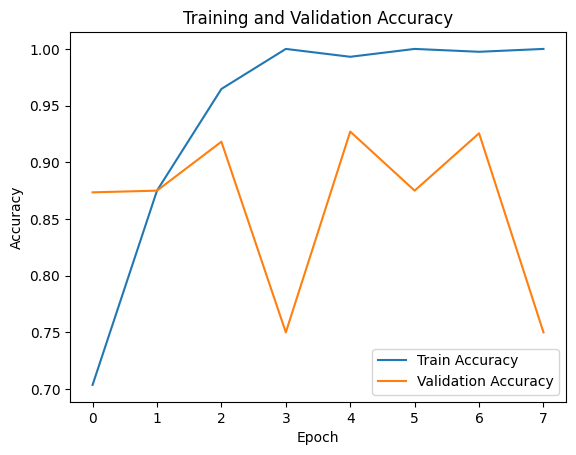

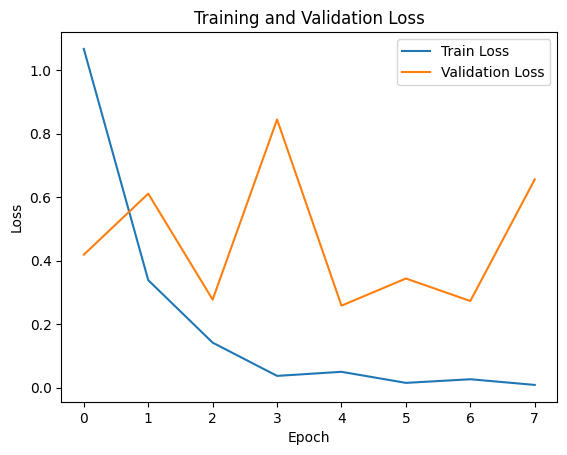


Train Accuracy: 0.998763918876648
Test Accuracy: 0.9264705777168274
22/22 ━━━━━━━━━━━━━━━━━━━━ 38s 1s/step


In [12]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.applications import DenseNet201
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.callbacks import EarlyStopping

# Set the directory path for your dataset
train_dir = 'images/train'
test_dir = 'images/test'

# Define parameters
batch_size = 32
img_height = 150
img_width = 150
num_classes = 24

# Create ImageDataGenerator instances
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Load and preprocess the training data
train_data_gen = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

# Load and preprocess the test data
test_data_gen = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

# Define the DenseNet201 model
base_model = DenseNet201(weights='imagenet', include_top=False)

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(512, activation='relu'),
    Dense(num_classes, activation='softmax')
])

# Freeze the base model layers
base_model.trainable = False

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Implement Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model
history = model.fit(
    train_data_gen,
    steps_per_epoch=train_data_gen.samples // batch_size,
    epochs=100,
    validation_data=test_data_gen,
    validation_steps=test_data_gen.samples // batch_size,
    callbacks=[early_stopping]
)

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

# Evaluate the model on training data
train_loss, train_accuracy = model.evaluate(train_data_gen, verbose=0)
print("\nTrain Accuracy:", train_accuracy)

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(test_data_gen, verbose=0)
print("Test Accuracy:", test_accuracy)

# Make predictions on test data
Y_pred = model.predict(test_data_gen)
y_pred = np.argmax(Y_pred, axis=1)
y_true = test_data_gen.classes

# Get class names from the data generator
class_names = list(train_data_gen.class_indices.keys())
